# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

cliente_id = os.environ.get("CLIENT_ID")
cliente_secret = os.environ.get("CLIENT_SECRET")



In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id =cliente_id
client_secret = cliente_secret
lz_uri = "spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq"
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(lz_uri)



In [9]:
results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4AK6F7OLvEQ5QYCBNiQWHq'},
      'href': 'https://api.spotify.com/v1/artists/4AK6F7OLvEQ5QYCBNiQWHq',
      'id': '4AK6F7OLvEQ5QYCBNiQWHq',
      'name': 'One Direction',
      'type': 'artist',
      'uri': 'spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',

In [3]:
canciones = []
popularidad = []
duracion = []


for track in results['tracks'][:10]:
    print("track     " + track["name"])
    canciones.append(track["name"])
    popularidad.append(track["popularity"])
    duracion.append(track["duration_ms"] / (1000 * 60) % 60)

track     Night Changes
track     Story of My Life
track     What Makes You Beautiful
track     Steal My Girl
track     Perfect
track     You & I
track     18
track     Right Now
track     Drag Me Down
track     Best Song Ever


In [4]:
import pandas as pd

df = pd.DataFrame()

df["canciones"] = canciones
df["popularidad"] = popularidad
df["duracion"] = duracion

df.index = range(1, len(df) + 1)

In [18]:
df

,canciones,popularidad,duracion
1,Night Changes,90,3.776667
2,Story of My Life,87,4.091550
3,What Makes You Beautiful,87,3.333100
4,Steal My Girl,85,3.802217
5,Perfect,83,3.838883
6,You & I,81,3.965550
7,18,81,4.139333
8,Right Now,81,3.340000
9,Drag Me Down,80,3.202000
10,Best Song Ever,80,3.335100


In [5]:
#Promedio de duracion de las canciones

def promedio_duracion(df):
    """
    Calcula el promedio de duración de las canciones en el DataFrame
    y lo devuelve en minutos 
    """
    promedio_ms = df['duracion'].mean()
    minutos = int(promedio_ms)*60
    return minutos

minutos = promedio_duracion(df)
print(f"Promedio de duración: {minutos} minutos")

Promedio de duración: 180 minutos


In [13]:
#Top 5 canciones mas escuchadas

def top_5_canciones_mas_populares(df):
    """
    Calcula las 5 canciones más populares 
    """

    top_5= df.sort_values(by='popularidad', ascending=False).head(5)
    return top_5[['canciones', 'popularidad']]

top_5 = top_5_canciones_mas_populares(df)
print("Top 5 canciones más populares:")
print(top_5)

Top 5 canciones más populares:
                  canciones  popularidad
1             Night Changes           90
2          Story of My Life           87
3  What Makes You Beautiful           87
4             Steal My Girl           85
5                   Perfect           83


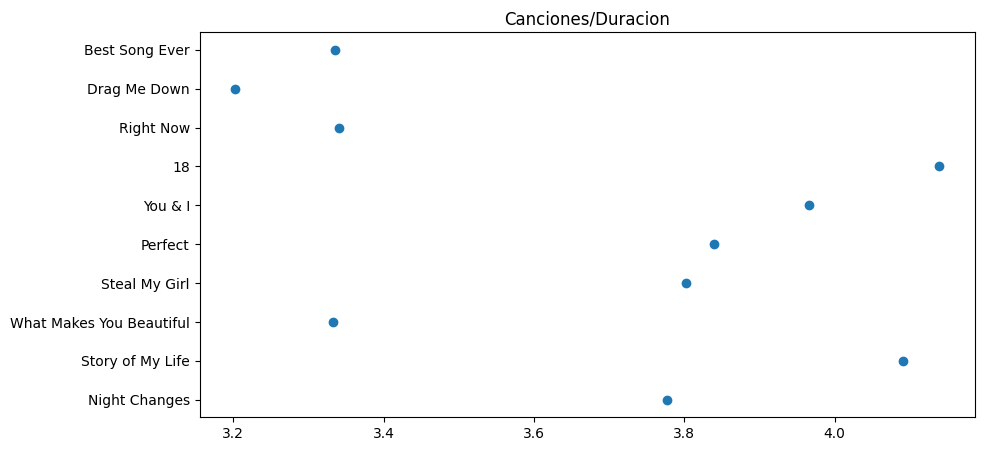

In [17]:
labels = df['canciones'].tolist()
values = df['duracion'].tolist()

plt.figure(figsize = (10, 5))

plt.scatter(values, labels)

plt.title("Canciones/Duracion")
plt.show()